## Convolutional Neural Network

### 1. 필요한 모듈 import

In [10]:
from google.colab import drive

import zipfile

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense, ZeroPadding2D, AveragePooling2D, Bidirectional, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint

from tensorflow.keras.applications import VGG16

In [2]:
# mount drive
drive.mount('/content/drive')

Mounted at /content/drive


### 2. 데이터 전처리

In [3]:
# Load Data
local_zip = './drive/MyDrive/Colab Notebooks/data/data.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('data/')
zip_ref.close()

#### 2_1 로드된 데이터 확인하기

Found 5400 images belonging to 90 classes.
(128, 300, 300, 3) (128, 90)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


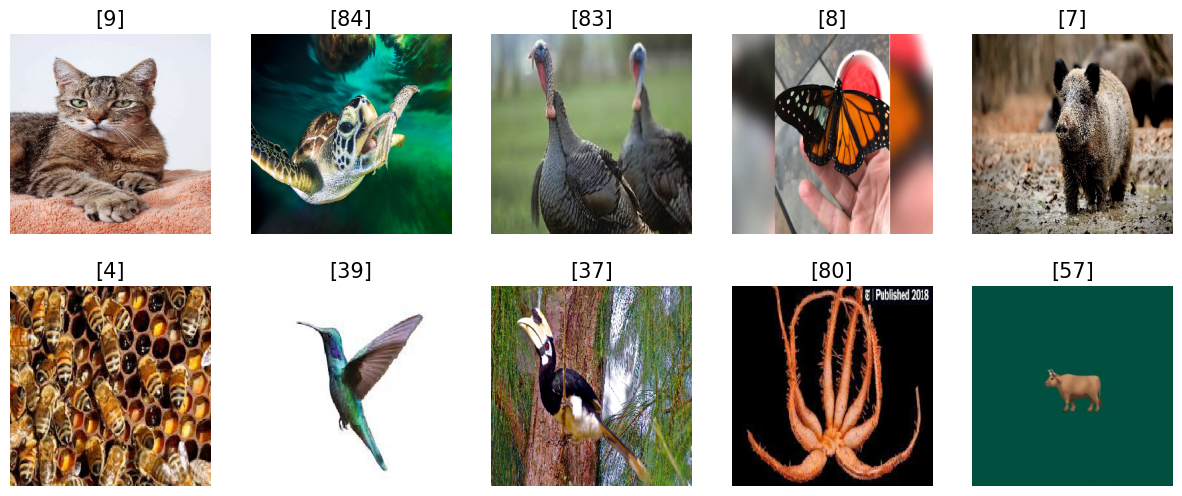

In [ ]:
path = 'data/animals'

original_datagen = ImageDataGenerator(rescale=1./ 255,)
original_generator = original_datagen.flow_from_directory(path,
                                                          batch_size=128,
                                                          target_size=(300, 300),
                                                          class_mode='categorical'
                                                          )

for x, y in original_generator:
  print(x.shape, y.shape)
  print(y[0])

  fig, axes = plt.subplots(2, 5)
  fig.set_size_inches(15, 6)
  for i in range(10):
    axes[i//5, i%5].imshow(x[i])
    axes[i//5, i%5].set_title(str(np.where(y[i] == 1)[0]), fontsize=15)
    axes[i//5, i%5].axis('off')
  break

plt.show()

In [4]:
# Data Augmentation
TRAINING_DIR = "data/animals/"
training_datagen = ImageDataGenerator(
    rescale=1./ 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)


In [5]:
training_generator = training_datagen.flow_from_directory(TRAINING_DIR,
                                                          batch_size=128,
                                                          target_size=(150, 150),
                                                          class_mode='categorical',
                                                          subset='training',
                                                          )
validation_generator = training_datagen.flow_from_directory(TRAINING_DIR,
                                                          batch_size=128,
                                                          target_size=(150, 150),
                                                          class_mode='categorical',
                                                          subset='validation',
                                                          )

Found 4320 images belonging to 90 classes.
Found 1080 images belonging to 90 classes.


### 3. 모델 정의(modeling)

In [ ]:
# Conv2D, MaxPooling2D 조합으로 층을 쌓습니다. 첫번째 입력층의 input_shape은 (150, 150, 3)으로 지정합니다.
model = Sequential([
Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)),
MaxPooling2D(2, 2),
Conv2D(64, (3, 3), activation='relu'),
MaxPooling2D(2, 2),
Conv2D(128, (3, 3), activation='relu'),
MaxPooling2D(2, 2),
Conv2D(128, (3, 3), activation='relu'),
MaxPooling2D(2, 2),
Flatten(),
Dropout(0.5),
Dense(512, activation='relu'),
Dense(90, activation='softmax'),
])

### 4. 모델 생성(compile)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
#model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [7]:
# ModelCheckPoint
checkpoint_path = "my_checkpoint.ckpt"
checkpoint = ModelCheckpoint(filepath=checkpoint_path,
                             save_weights_only=True, # weights 정보만
                             save_best_only=True,  # 가장 좋은 모델 정보만
                             monitor='val_loss',
                             verbose=0) # 1: 학습과정 노출, 0: 학습과정 비노출


### 5. 학습(fit)

In [ ]:
# 5. 학습(fit)
history = model.fit(training_generator,
                    validation_data=(validation_generator),
                    epochs=20,
                    callbacks=[checkpoint], # 콜백 함수를 통해 checkpoint 생성
                    )

Epoch 1/20
34/34 [==============================] - 83s 2s/step - loss: 4.4413 - acc: 0.0144 - val_loss: 4.3580 - val_acc: 0.0287
Epoch 2/20
34/34 [==============================] - 73s 2s/step - loss: 4.2721 - acc: 0.0352 - val_loss: 4.2197 - val_acc: 0.0463
Epoch 3/20
34/34 [==============================] - 63s 2s/step - loss: 4.1276 - acc: 0.0523 - val_loss: 4.1374 - val_acc: 0.0491
Epoch 4/20
34/34 [==============================] - 65s 2s/step - loss: 3.9929 - acc: 0.0808 - val_loss: 3.9946 - val_acc: 0.0824
Epoch 5/20
34/34 [==============================] - 64s 2s/step - loss: 3.8383 - acc: 0.0975 - val_loss: 3.8733 - val_acc: 0.0926
Epoch 6/20
34/34 [==============================] - 64s 2s/step - loss: 3.7080 - acc: 0.1206 - val_loss: 3.8460 - val_acc: 0.1139
Epoch 7/20
34/34 [==============================] - 64s 2s/step - loss: 3.6048 - acc: 0.1354 - val_loss: 3.6950 - val_acc: 0.1185
Epoch 8/20
34/34 [==============================] - 75s 2s/step - loss: 3.4376 - acc: 0.16

In [ ]:
model.load_weights(checkpoint_path)

In [12]:
def loss_acc_visualization(history, epochs, name):
  # Loss 시각화
  plt.figure(figsize=(12, 9))
  plt.plot(np.arange(1, epochs+1), history.history['loss'])
  plt.plot(np.arange(1, epochs+1), history.history['val_loss'])
  plt.title(name + ' Loss / Val Loss', fontsize=20)
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend(['loss', 'val_loss'], fontsize=15)
  plt.show()

  # Accuracy 시각화
  plt.figure(figsize=(12, 9))
  plt.plot(np.arange(1, epochs+1), history.history['accuracy'])
  plt.plot(np.arange(1, epochs+1), history.history['val_accuracy'])
  plt.title(name + ' Acc / Val Acc', fontsize=20)
  plt.xlabel('Epochs')
  plt.ylabel('Acc')
  plt.legend(['acc', 'val_acc'], fontsize=15)
  plt.show()

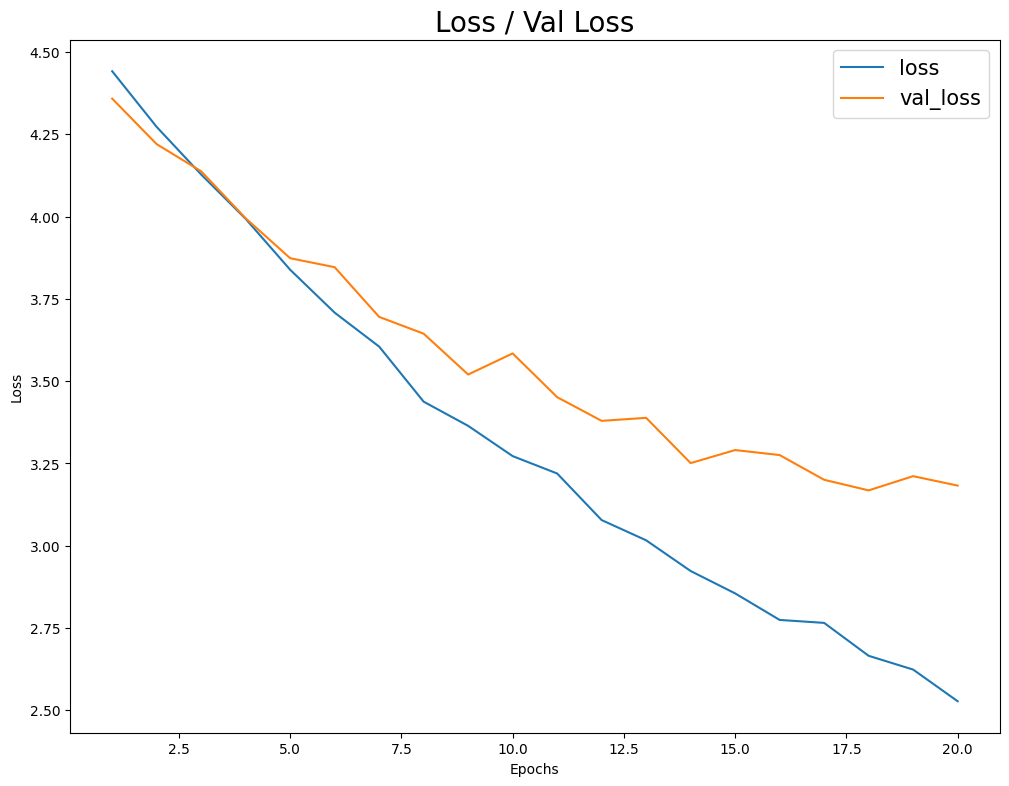

In [ ]:
# Loss 시각화
plt.figure(figsize=(12, 9))
plt.plot(np.arange(1, 21), history.history['loss'])
plt.plot(np.arange(1, 21), history.history['val_loss'])
plt.title('Loss / Val Loss', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss', 'val_loss'], fontsize=15)
plt.show()

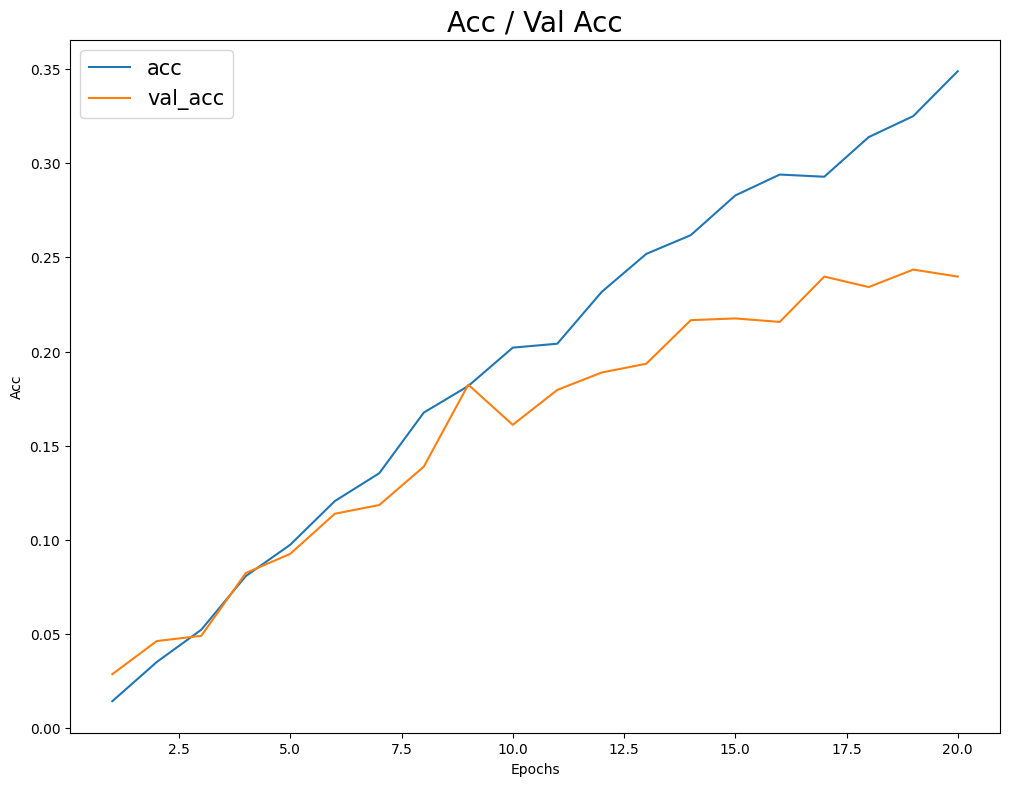

In [ ]:
# Accuracy 시각화
plt.figure(figsize=(12, 9))
plt.plot(np.arange(1, 21), history.history['acc'])
plt.plot(np.arange(1, 21), history.history['val_acc'])
plt.title('Acc / Val Acc', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend(['acc', 'val_acc'], fontsize=15)
plt.show()

### Loss Function 비교

In [ ]:
# sparse_categorical
sparse_training_generator = training_datagen.flow_from_directory(TRAINING_DIR,
                                                          batch_size=128,
                                                          target_size=(150, 150),
                                                          class_mode='sparse',
                                                          subset='training',
                                                          )
sparse_validation_generator = training_datagen.flow_from_directory(TRAINING_DIR,
                                                          batch_size=128,
                                                          target_size=(150, 150),
                                                          class_mode='sparse',
                                                          subset='validation',
                                                          )


Found 4320 images belonging to 90 classes.
Found 1080 images belonging to 90 classes.


In [ ]:
# Conv2D, MaxPooling2D 조합으로 층을 쌓습니다. 첫번째 입력층의 input_shape은 (150, 150, 3)으로 지정합니다.
model = Sequential([
Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)),
MaxPooling2D(2, 2),
Conv2D(64, (3, 3), activation='relu'),
MaxPooling2D(2, 2),
Conv2D(128, (3, 3), activation='relu'),
MaxPooling2D(2, 2),
Conv2D(128, (3, 3), activation='relu'),
MaxPooling2D(2, 2),
Flatten(),
Dropout(0.5),
Dense(512, activation='relu'),
Dense(90, activation='softmax'),
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
# 5. 학습(fit)
history = model.fit(sparse_training_generator,
                    validation_data=(sparse_validation_generator),
                    epochs=20,
                    callbacks=[checkpoint], # 콜백 함수를 통해 checkpoint 생성
                    )

Epoch 1/20
34/34 [==============================] - 61s 2s/step - loss: 4.4600 - acc: 0.0141 - val_loss: 4.3754 - val_acc: 0.0259
Epoch 2/20
34/34 [==============================] - 68s 2s/step - loss: 4.3006 - acc: 0.0264 - val_loss: 4.2373 - val_acc: 0.0472
Epoch 3/20
34/34 [==============================] - 69s 2s/step - loss: 4.1259 - acc: 0.0558 - val_loss: 4.0844 - val_acc: 0.0731
Epoch 4/20
34/34 [==============================] - 63s 2s/step - loss: 3.9567 - acc: 0.0810 - val_loss: 3.9607 - val_acc: 0.0880
Epoch 5/20
34/34 [==============================] - 61s 2s/step - loss: 3.8220 - acc: 0.1002 - val_loss: 3.9012 - val_acc: 0.0954
Epoch 6/20
34/34 [==============================] - 58s 2s/step - loss: 3.7011 - acc: 0.1187 - val_loss: 3.8204 - val_acc: 0.1111
Epoch 7/20
34/34 [==============================] - 58s 2s/step - loss: 3.5971 - acc: 0.1345 - val_loss: 3.7552 - val_acc: 0.1278
Epoch 8/20
34/34 [==============================] - 59s 2s/step - loss: 3.4708 - acc: 0.16

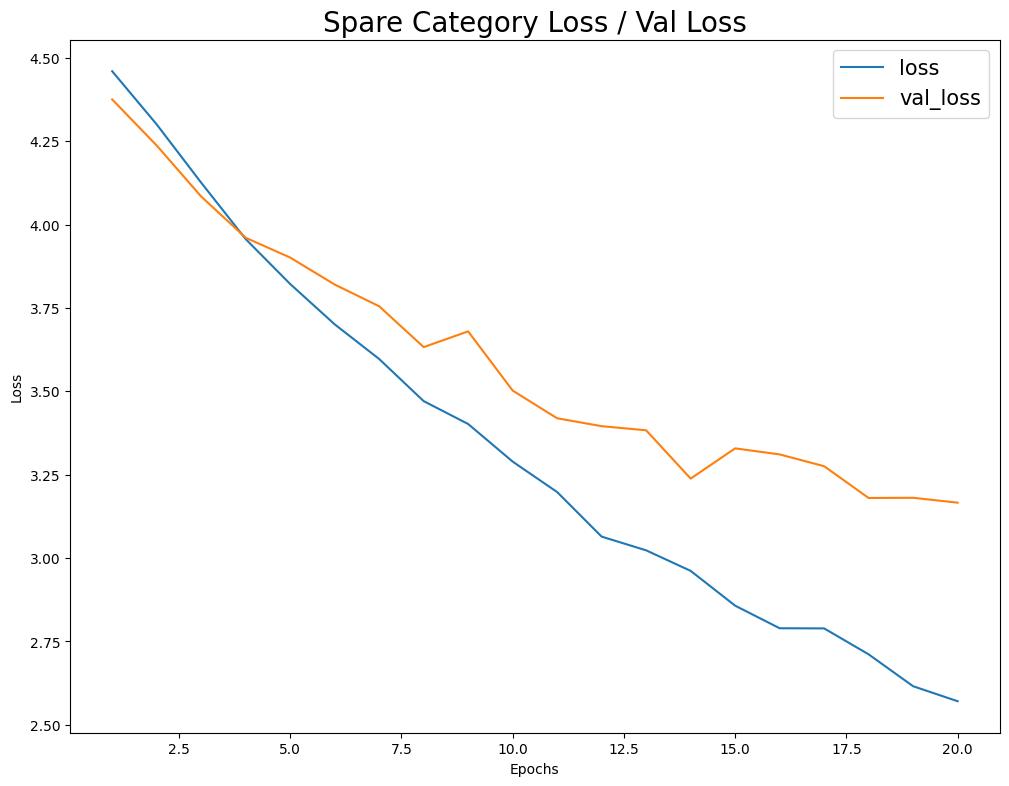

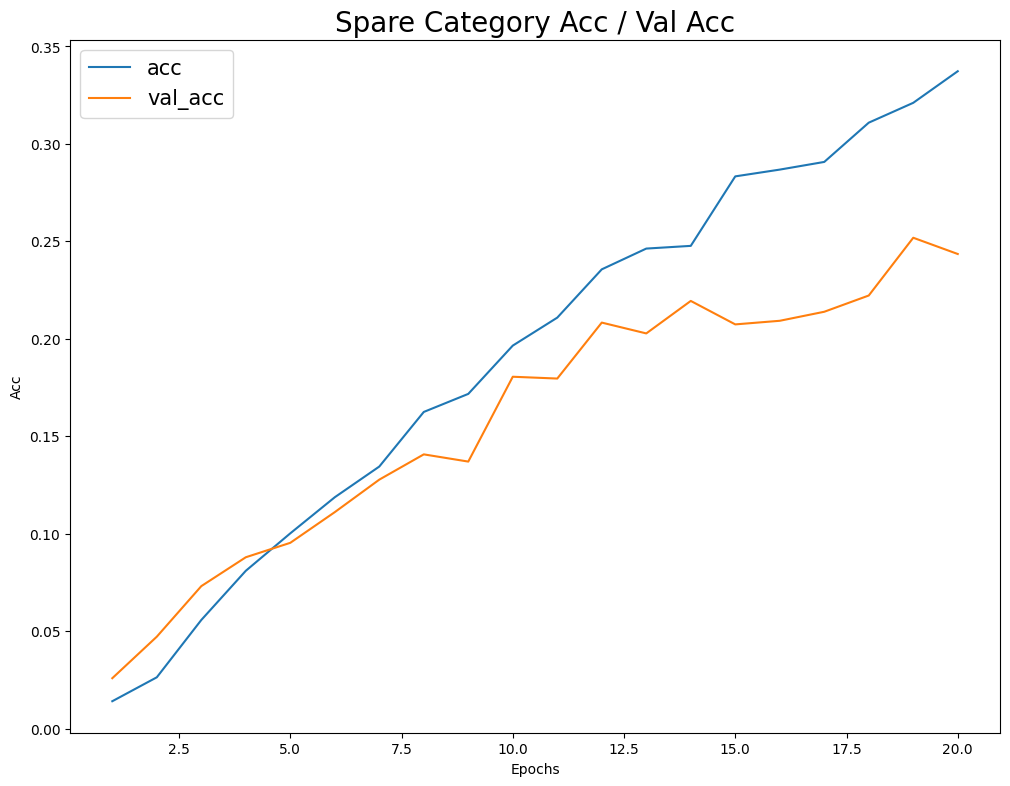

In [ ]:
loss_acc_visualization(history, 20, 'Spare Category')

### 합성곱 연산 비교

In [ ]:
# 기본값 모델 - strides=(1,1), padding='valid'
history = model.fit(training_generator,
                    validation_data=(validation_generator),
                    epochs=10,
                    callbacks=[checkpoint], # 콜백 함수를 통해 checkpoint 생성
                    )

Epoch 1/10
34/34 [==============================] - 60s 2s/step - loss: 4.4769 - acc: 0.0144 - val_loss: 4.3929 - val_acc: 0.0259
Epoch 2/10
34/34 [==============================] - 70s 2s/step - loss: 4.3424 - acc: 0.0259 - val_loss: 4.2894 - val_acc: 0.0472
Epoch 3/10
34/34 [==============================] - 68s 2s/step - loss: 4.2280 - acc: 0.0382 - val_loss: 4.1797 - val_acc: 0.0519
Epoch 4/10
34/34 [==============================] - 57s 2s/step - loss: 4.0858 - acc: 0.0623 - val_loss: 4.0609 - val_acc: 0.0667
Epoch 5/10
34/34 [==============================] - 59s 2s/step - loss: 3.9815 - acc: 0.0785 - val_loss: 3.9740 - val_acc: 0.0741
Epoch 6/10
34/34 [==============================] - 60s 2s/step - loss: 3.8371 - acc: 0.0972 - val_loss: 3.8713 - val_acc: 0.0917
Epoch 7/10
34/34 [==============================] - 57s 2s/step - loss: 3.7353 - acc: 0.1171 - val_loss: 3.8061 - val_acc: 0.0991
Epoch 8/10
34/34 [==============================] - 57s 2s/step - loss: 3.6338 - acc: 0.12

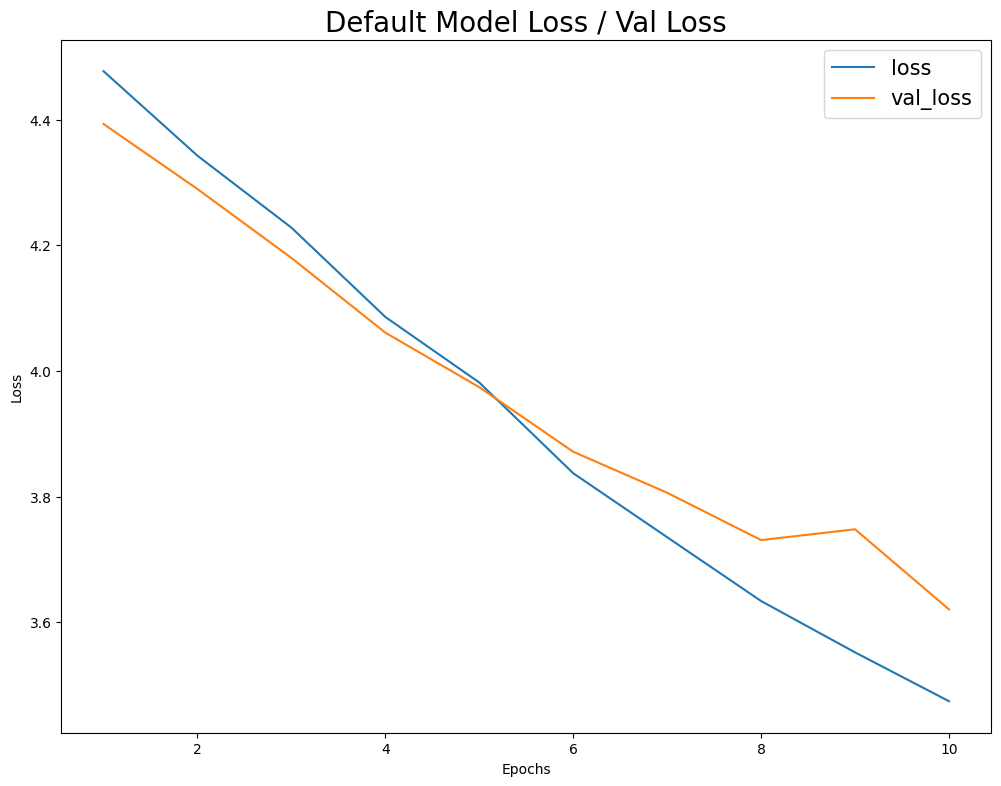

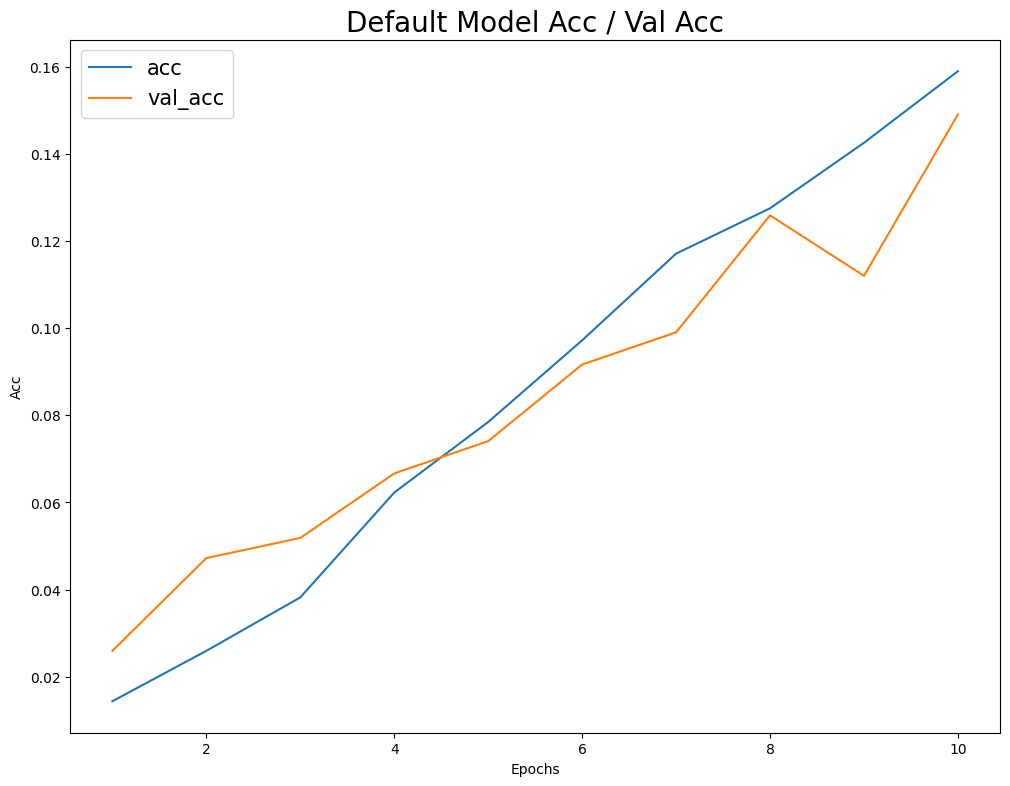

In [ ]:
loss_acc_visualization(history, 10, 'Default Model')

In [ ]:
# strides=(2,2)
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3), strides=(2, 2), padding='same'),
    ZeroPadding2D(padding=(1, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu', strides=(2, 2), padding='same'),
    ZeroPadding2D(padding=(1, 1)),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu', strides=(2, 2), padding='same'),
    ZeroPadding2D(padding=(1, 1)),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu', strides=(2, 2), padding='same'),
    ZeroPadding2D(padding=(1, 1)),
    MaxPooling2D(2, 2),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(90, activation='softmax'),
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
# 지정값 모델 - strides=(2,2), padding='same'
history = model.fit(training_generator,
                    validation_data=(validation_generator),
                    epochs=10,
                    callbacks=[checkpoint], # 콜백 함수를 통해 checkpoint 생성
                    )

Epoch 1/10
34/34 [==============================] - 73s 2s/step - loss: 4.5014 - acc: 0.0116 - val_loss: 4.4885 - val_acc: 0.0241
Epoch 2/10
34/34 [==============================] - 59s 2s/step - loss: 4.3989 - acc: 0.0215 - val_loss: 4.3520 - val_acc: 0.0343
Epoch 3/10
34/34 [==============================] - 59s 2s/step - loss: 4.3072 - acc: 0.0271 - val_loss: 4.2812 - val_acc: 0.0333
Epoch 4/10
34/34 [==============================] - 62s 2s/step - loss: 4.2332 - acc: 0.0352 - val_loss: 4.1983 - val_acc: 0.0546
Epoch 5/10
34/34 [==============================] - 60s 2s/step - loss: 4.1379 - acc: 0.0442 - val_loss: 4.1158 - val_acc: 0.0593
Epoch 6/10
34/34 [==============================] - 59s 2s/step - loss: 4.0666 - acc: 0.0525 - val_loss: 4.0556 - val_acc: 0.0574
Epoch 7/10
34/34 [==============================] - 59s 2s/step - loss: 3.9851 - acc: 0.0627 - val_loss: 3.9670 - val_acc: 0.0750
Epoch 8/10
34/34 [==============================] - 61s 2s/step - loss: 3.9102 - acc: 0.07

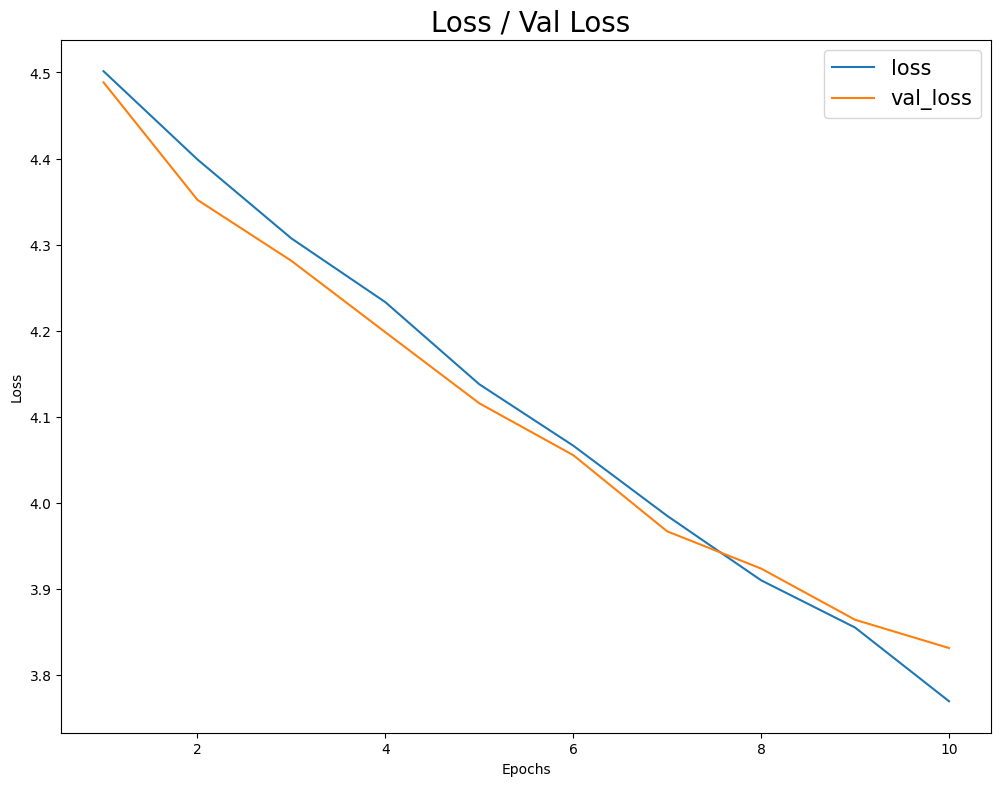

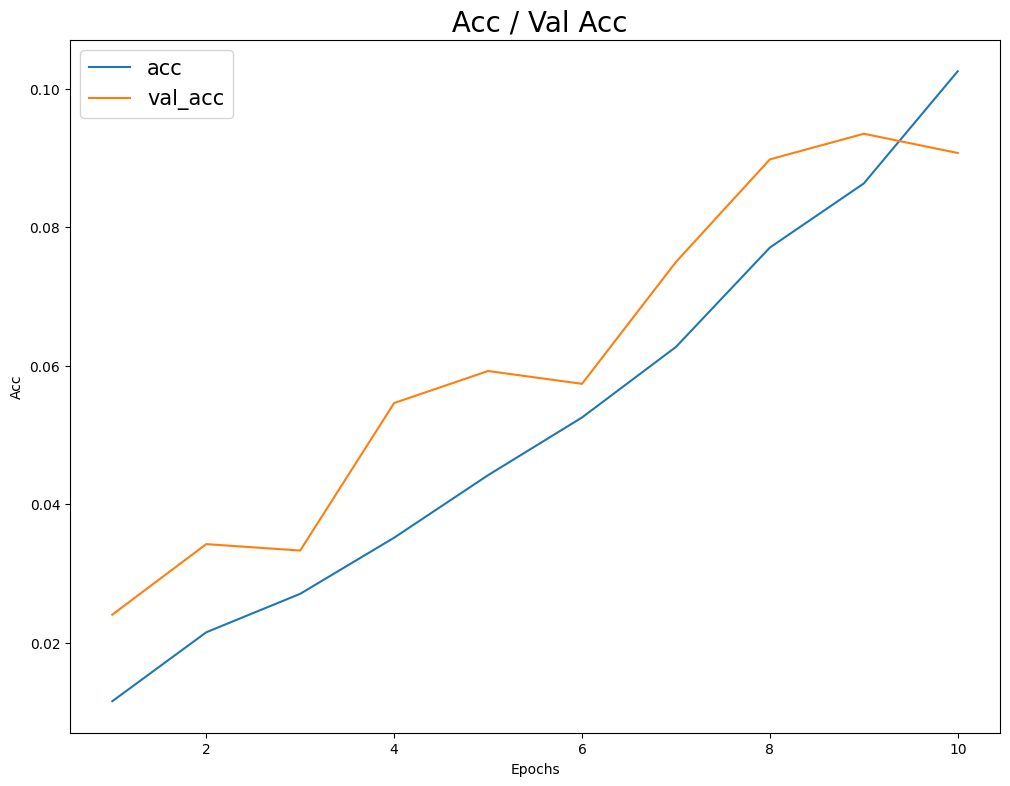

In [ ]:
loss_acc_visualization(history, 10, '')

In [ ]:
# 합성곱 연산 비교 - Pooling

model = Sequential([
Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)),
AveragePooling2D(2, 2),
Conv2D(64, (3, 3), activation='relu'),
AveragePooling2D(2, 2),
Conv2D(128, (3, 3), activation='relu'),
AveragePooling2D(2, 2),
Conv2D(128, (3, 3), activation='relu'),
AveragePooling2D(2, 2),
Flatten(),
Dropout(0.5),
Dense(512, activation='relu'),
Dense(90, activation='softmax'),
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
# 지정값 모델 - strides=(2,2), padding='same'
history = model.fit(training_generator,
                    validation_data=(validation_generator),
                    epochs=10,
                    callbacks=[checkpoint], # 콜백 함수를 통해 checkpoint 생성
                    )

Epoch 1/10
34/34 [==============================] - 62s 2s/step - loss: 4.4896 - acc: 0.0113 - val_loss: 4.4334 - val_acc: 0.0213
Epoch 2/10
34/34 [==============================] - 59s 2s/step - loss: 4.3411 - acc: 0.0278 - val_loss: 4.2802 - val_acc: 0.0361
Epoch 3/10
34/34 [==============================] - 57s 2s/step - loss: 4.1895 - acc: 0.0470 - val_loss: 4.1804 - val_acc: 0.0500
Epoch 4/10
34/34 [==============================] - 58s 2s/step - loss: 4.1063 - acc: 0.0567 - val_loss: 4.0912 - val_acc: 0.0685
Epoch 5/10
34/34 [==============================] - 58s 2s/step - loss: 4.0346 - acc: 0.0681 - val_loss: 4.0727 - val_acc: 0.0769
Epoch 6/10
34/34 [==============================] - 59s 2s/step - loss: 3.8989 - acc: 0.0898 - val_loss: 3.9596 - val_acc: 0.0787
Epoch 7/10
34/34 [==============================] - 58s 2s/step - loss: 3.7927 - acc: 0.1007 - val_loss: 3.8739 - val_acc: 0.0898
Epoch 8/10
34/34 [==============================] - 58s 2s/step - loss: 3.6936 - acc: 0.12

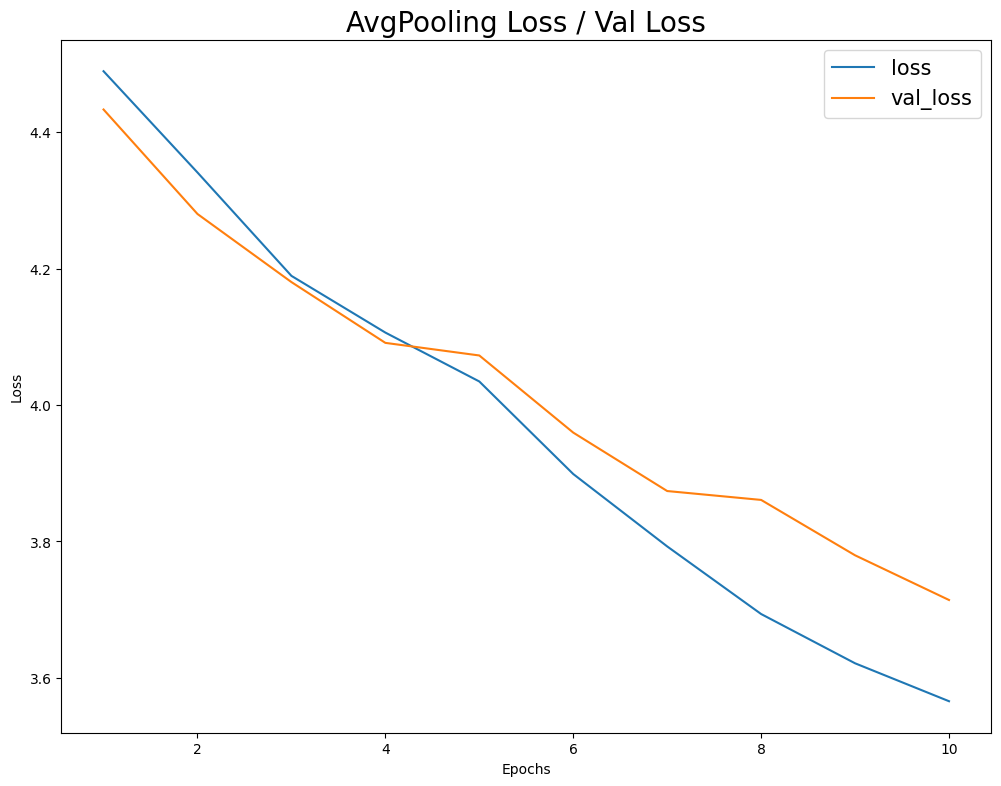

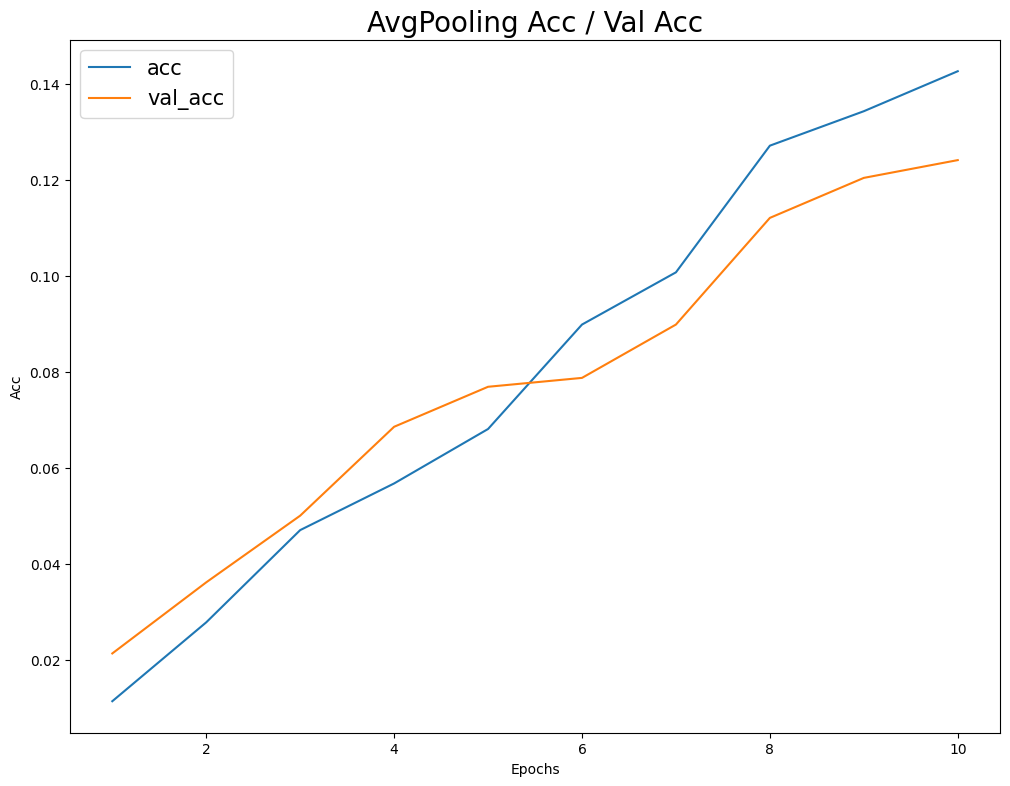

In [ ]:
loss_acc_visualization(history, 10, 'AvgPooling')

### Bidirectional


In [16]:
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dropout(0.5),
    Bidirectional(LSTM(512, activation='relu')),
    Dense(90, activation='softmax'),
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

ValueError: Input 0 of layer "bidirectional_2" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 6272)

In [ ]:
# 지정값 모델 - strides=(2,2), padding='same'
history = model.fit(training_generator,
                    validation_data=(validation_generator),
                    epochs=20,
                    callbacks=[checkpoint], # 콜백 함수를 통해 checkpoint 생성
                    )

In [ ]:
loss_acc_visualization(history, 20, 'Bidirectional LSTM')

## VGG16

In [8]:
# Load the pre-trained VGG16 model
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the convolutional layers
for layer in vgg_base.layers:
    layer.trainable = False

# Create a new model and add VGG16 as the base
model = Sequential([
    vgg_base,
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(90, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 5. 학습(fit)
history = model.fit(training_generator,
                      validation_data=(validation_generator),
                      epochs=20,
                      callbacks=[checkpoint], # 콜백 함수를 통해 checkpoint 생성
                    )

Epoch 1/20
34/34 [==============================] - 86s 2s/step - loss: 4.4056 - accuracy: 0.0521 - val_loss: 3.9813 - val_accuracy: 0.1120
Epoch 2/20
34/34 [==============================] - 61s 2s/step - loss: 3.5875 - accuracy: 0.1667 - val_loss: 3.3574 - val_accuracy: 0.2157
Epoch 3/20
34/34 [==============================] - 61s 2s/step - loss: 3.0557 - accuracy: 0.2671 - val_loss: 3.0526 - val_accuracy: 0.2769
Epoch 4/20
34/34 [==============================] - 61s 2s/step - loss: 2.7422 - accuracy: 0.3354 - val_loss: 2.8122 - val_accuracy: 0.3333
Epoch 5/20
34/34 [==============================] - 60s 2s/step - loss: 2.5173 - accuracy: 0.3727 - val_loss: 2.7921 - val_accuracy: 0.3213
Epoch 6/20
34/34 [==============================] - 60s 2s/step - loss: 2.3233 - accuracy: 0.4053 - val_loss: 2.6612 - val_accuracy: 0.3546
Epoch 7/20
34/34 [==============================] - 70s 2s/step - loss: 2.2257 - accuracy: 0.4317 - val_loss: 2.5088 - val_accuracy: 0.3991
Epoch 8/20
34/34 [==

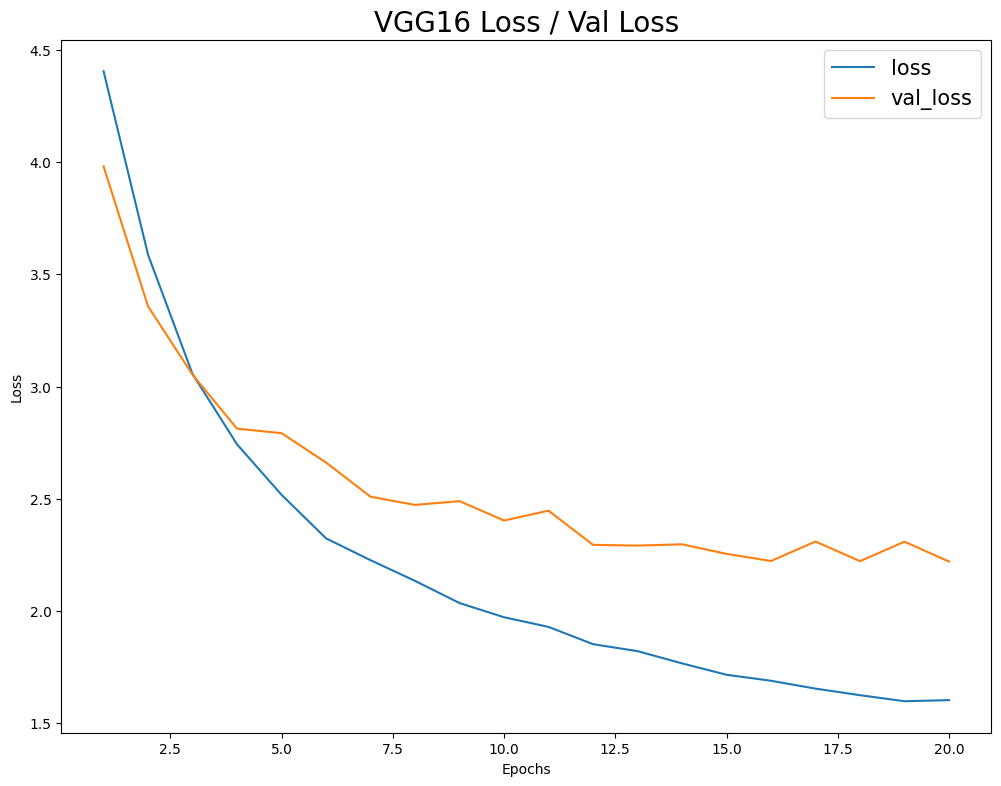

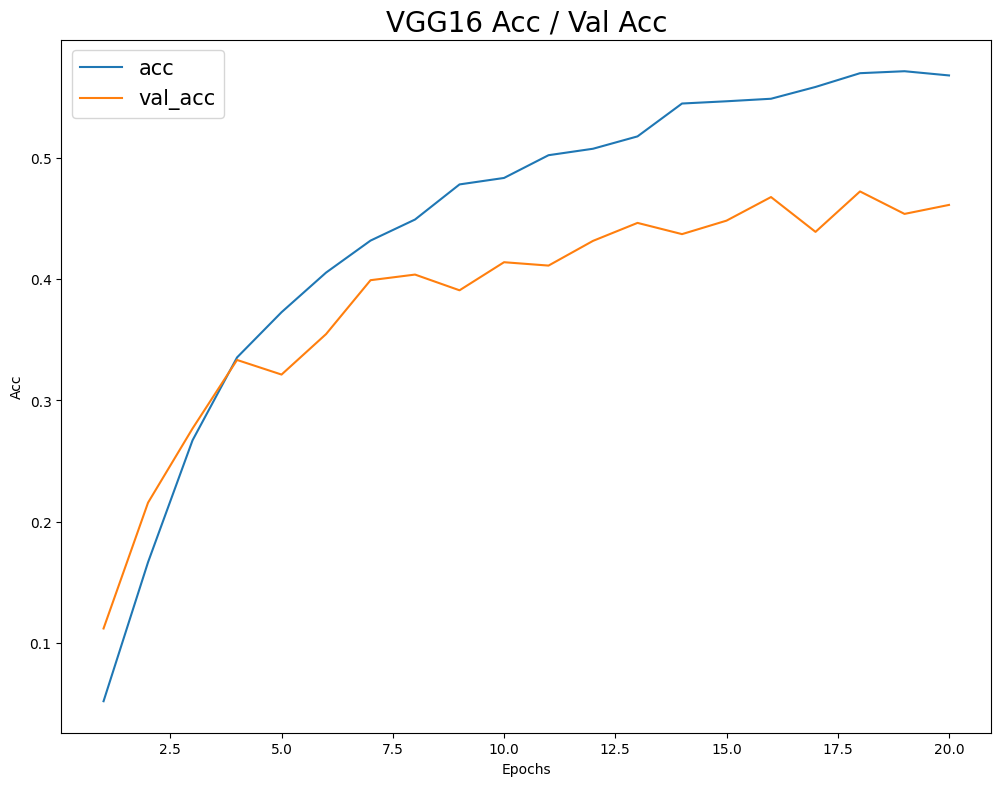

In [17]:
loss_acc_visualization(history, 20, 'VGG16')